# Generalized Linear Models




A simple way to construct a model of our data is to assume that the target, `y`, is a linear combination of the data, `X`. That is to say that we can multiply each feature of `X_i` by some weight `w_i` (and add a constant `b`) to get our original `y`:

$$y = X w + b$$

Since this calculated `y` is sure to be different from our original results, lets call it `h`. To determine how inaccurate the model is, simply subtract each ``h`` from the corresponding correct ``y``; if you square the result, you'll get the absolute error, ignoring the sign. Add this error over all the samples and divide by the number of samples to get the Mean Squared Error:

$$MSE = \frac{1}{n} \sum_{i}^{n} (h_i - y_i)^2 = \frac{1}{n} \sum_{i}^{n} (X_i w + b - y_i)^2$$

The goal of learning our model then becomes minimizing this error by finding the best `w` and `b`.

To see this demonstrated, let's fit a line to a `sin` wave:

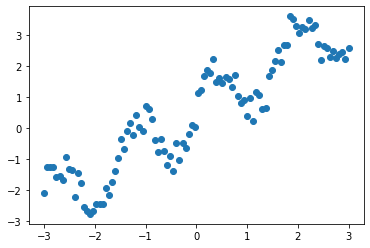

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
plt.scatter(x, y);

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X, y)
print('Score: {}, w: {}, b: {}'.format(regressor.score(X, y), regressor.coef_, regressor.intercept_))

Score: 0.814449824117816, w: [0.92661741], b: 0.4701807433782093


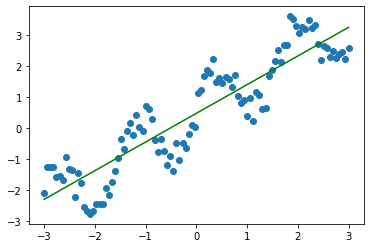

In [ ]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt], color='g')
plt.scatter(X, y);

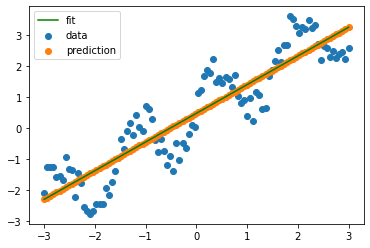

In [ ]:
h = regressor.predict(X)
plt.scatter(X, y, label='data')
plt.scatter(X, h, label='prediction')
plt.plot([X.min(), X.max()], [min_pt, max_pt], color='g', label='fit')
plt.legend(loc='best');

This method has been using the 'Ordinary Least squares' method to minimize the MSE:

$$MSE = \frac{1}{n} \sum_{i}^{n} (h_i - y_i)^2 = \frac{1}{n} \sum_{i}^{n} (X_i w + b - y_i)^2$$

Other linear models are available which use different error metrics. One example is ElasticNet:

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X, y)
print('Least squares: {}, Elastic Net: {}'.format(regressor.score(X, y), elastic.score(X, y)))

Least squares: 0.814449824117816, Elastic Net: 0.7450199241164531


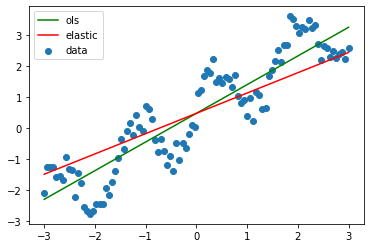

In [ ]:
min_pt_e = X.min() * elastic.coef_[0] + elastic.intercept_
max_pt_e = X.max() * elastic.coef_[0] + elastic.intercept_

h = regressor.predict(X)
plt.scatter(X, y, label='data')
plt.plot([X.min(), X.max()], [min_pt, max_pt], color='g', label='ols')
plt.plot([X.min(), X.max()], [min_pt_e, max_pt_e], color='r', label='elastic')
plt.legend(loc='best');

<div class="alert alert-success">
    <b>EXERCISE: Linear regression on the diabetes dataset</b>:
     <ul>
      <li>
      Download ``02_diabetes_linear.py`` from the course website. Change the feature that linear regression is used on and see if any feature can be accurately described using linear regression.
      </li>
    </ul>
</div>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

for feature in range(10):

    diabetes_X = diabetes.data[:, np.newaxis, feature]

    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]

    # Split the targets into training/testing sets
    diabetes_y_train = diabetes.target[:-20]
    diabetes_y_test = diabetes.target[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

    # Make predictions using the testing set
    diabetes_y_pred = regr.predict(diabetes_X_test)

    # The coefficients
    # print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
        % mean_squared_error(diabetes_y_test, diabetes_y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

'''
    # Plot outputs
    plt.figure(figsize=(20,10))
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
'''

Mean squared error: 5472.26
Variance score: -0.13
Mean squared error: 5501.91
Variance score: -0.14
Mean squared error: 2548.07
Variance score: 0.47
Mean squared error: 4058.41
Variance score: 0.16
Mean squared error: 5608.70
Variance score: -0.16
Mean squared error: 5564.14
Variance score: -0.15
Mean squared error: 4538.34
Variance score: 0.06
Mean squared error: 4850.82
Variance score: -0.00
Mean squared error: 2923.34
Variance score: 0.39
Mean squared error: 5265.50
Variance score: -0.09


"\n    # Plot outputs\n    plt.figure(figsize=(20,10))\n    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')\n    plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)\n\n    plt.xticks(())\n    plt.yticks(())\n\n    plt.show()\n"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

features = [2, 8]

diabetes_X = diabetes.data

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20, features]
diabetes_X_test = diabetes_X[-20:, features]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [669.65033119 609.73334589]
Mean squared error: 1984.51
Variance score: 0.59


## Classification

By drawing lines which splits the dataset, we can use this method for classification. However, we use a function, called a logistic function, to better separate the classes. This is therefore known as "logistic regression", which, despite its name, is a classification method. Here, we'll look at a method called "One-vs-Rest logistic regression" where a line is fit for each class.

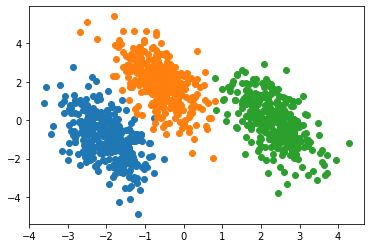

In [ ]:
from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for i in range(len(centers)):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='ovr').fit(X, y)
clf.coef_, clf.intercept_

(array([[-4.41502175, -2.23052321],
        [-0.36790997,  1.64019198],
        [ 4.70152578,  0.18083184]]),
 array([-4.60855523, -1.91396218, -4.17029216]))

In [ ]:
prediction = clf.predict(X)
clf.score(X, y)

0.976

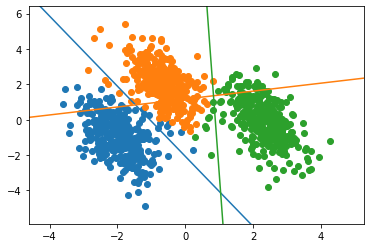

In [ ]:
for i in range(len(centers)):
    idx = np.where(prediction == i)
    plt.scatter(X[idx, 0], X[idx, 1])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
def line(c, x0):
    return (-(x0 * clf.coef_[c, 0]) - clf.intercept_[c]) / clf.coef_[c, 1]
    
for c in clf.classes_:
    plt.plot([x_min, x_max], [line(c, x_min), line(c, x_max)])
        
axes = plt.gca()
axes.set_xlim([x_min, x_max])
axes.set_ylim([y_min, y_max])
plt.show()

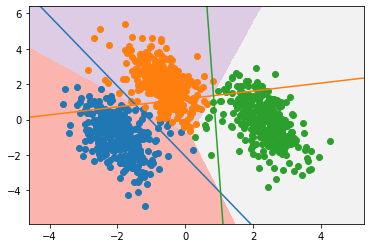

In [ ]:
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.axis('tight')
for i in range(len(centers)):
    idx = np.where(prediction == i)
    plt.scatter(X[idx, 0], X[idx, 1])
for c in clf.classes_:
    plt.plot([x_min, x_max], [line(c, x_min), line(c, x_max)])